In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm # Has various stats models for modeling data.
from statsmodels.graphics.api import abline_plot # Has graphical features.
from sklearn.metrics import mean_squared_error, r2_score #Calculates relevant metrics for performance.
from sklearn.model_selection import train_test_split # Can use to split the data into 2.
from sklearn import linear_model, preprocessing # For creating linear regression models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
import pickle
from xgboost import XGBRegressor

In [141]:
df=pd.read_csv('preprocessed_Financial_Data.csv')

In [142]:
df.head()

,Description,label,Headlines,Time,company,ticker,Company,Returns
0,Several prominent investors put fresh money to...,positive,Prominent managers loaded up on Apple before r...,2018-11-14,"['Apple', 'iPhone']",AAPL,Apple,0.024679
1,Asia's internet firms are challenging the regi...,negative,Asia's tech champions zero in on main street b...,2019-04-15,"['Alibaba', 'Tencent']",BABA,Alibaba,0.014803
2,Australia's parliament on Thursday passed a bi...,positive,Australia passes bill to force tech firms to h...,2018-12-06,"[""Alphabet Inc's"", 'Apple']",GOOG,"""Alphabet Incs""",-0.030127
3,The Dow and S&P 500 ended slightly higher on W...,positive,"Dow, S&P 500 end up slightly after trade talk ...",2018-09-12,"['Dow', 'Nasdaq', 'Apple', 'iPhones']",DDI,Dow,NaN
4,Several large U.S. retailers recorded higher s...,positive,Amazon U.S. rivals get sales boost on Prime Da...,2019-07-16,"[""Amazon.com Inc's"", 'Adobe Analytics']",AMZN,"""Amazon.com Incs""",0.009849


In [143]:
df.dropna(inplace=True)

In [144]:
df.head(20)

,Description,label,Headlines,Time,company,ticker,Company,Returns
0,Several prominent investors put fresh money to...,positive,Prominent managers loaded up on Apple before r...,2018-11-14,"['Apple', 'iPhone']",AAPL,Apple,0.024679
1,Asia's internet firms are challenging the regi...,negative,Asia's tech champions zero in on main street b...,2019-04-15,"['Alibaba', 'Tencent']",BABA,Alibaba,0.014803
2,Australia's parliament on Thursday passed a bi...,positive,Australia passes bill to force tech firms to h...,2018-12-06,"[""Alphabet Inc's"", 'Apple']",GOOG,"""Alphabet Incs""",-0.030127
4,Several large U.S. retailers recorded higher s...,positive,Amazon U.S. rivals get sales boost on Prime Da...,2019-07-16,"[""Amazon.com Inc's"", 'Adobe Analytics']",AMZN,"""Amazon.com Incs""",0.009849
5,The U.S. listed equity options market is set f...,positive,U.S. stock options volume on pace for a record...,2018-09-28,['OCC'],OCC,OCC,0.015113
6,"Schlumberger, the world's largest oilfield ser...",negative,Exclusive: Schlumberger names new top executiv...,2020-05-21,['Schlumberger'],SLB,Schlumberger,-0.011804
7,Tim Harris was preparing to relocate for an as...,neutral,"This could be the one that gets me,' says oilf...",2020-05-26,['Tim Harris'],ADAP,Tim Harris,-0.015192
9,EBay Inc raised its full-year sales and profit...,positive,EBay raises forecast as redesign draws custome...,2019-04-23,['EBay Inc'],BTE,EBay Inc,-0.065502
16,Indonesia's Lion Air is considering cancelling...,negative,Lion Air CEO says possible will cancel Boeing ...,2018-12-06,"['Lion Air', 'Boeing Co', 'MAX']",BATL,Lion Air,-0.109524
18,Alibaba will stop taking orders from prospecti...,neutral,Alibaba to close books early in $13.4 billion ...,2019-11-18,['Alibaba'],BABA,Alibaba,-0.008650


In [146]:
def buy_stock(x):
    return (x>0).sum()

In [147]:
stock_buy_df=df.groupby('ticker')['Returns'].agg(['sum',buy_stock,'count']).rename(columns={'sum':'buys'})
stock_buy_df['stock_buy_perc']=((stock_buy_df['buy_stock']*1.0)/len(df))
stock_buy_df.head(10)

,buys,buy_stock,count,stock_buy_perc
ticker,,,,
A,0.062203,10.0,15,0.001426
AA,0.047463,3.0,4,0.000428
AAL,-0.745519,16.0,35,0.002281
AAMC,0.886530,139.0,300,0.019820
AAME,0.027932,3.0,6,0.000428
AAOI,0.030366,3.0,4,0.000428
AAON,0.056702,2.0,2,0.000285
AAP,0.012879,2.0,2,0.000285
AAPL,0.498715,184.0,355,0.026237


In [148]:
stock_buy_df.head()

,buys,buy_stock,count,stock_buy_perc
ticker,,,,
A,0.062203,10.0,15,0.001426
AA,0.047463,3.0,4,0.000428
AAL,-0.745519,16.0,35,0.002281
AAMC,0.886530,139.0,300,0.019820
AAME,0.027932,3.0,6,0.000428


In [149]:
df=df.merge(stock_buy_df['stock_buy_perc'],on='ticker',how='left')

In [150]:
df.head()

,Description,label,Headlines,Time,company,ticker,Company,Returns,stock_buy_perc
0,Several prominent investors put fresh money to...,positive,Prominent managers loaded up on Apple before r...,2018-11-14,"['Apple', 'iPhone']",AAPL,Apple,0.024679,0.026237
1,Asia's internet firms are challenging the regi...,negative,Asia's tech champions zero in on main street b...,2019-04-15,"['Alibaba', 'Tencent']",BABA,Alibaba,0.014803,0.002424
2,Australia's parliament on Thursday passed a bi...,positive,Australia passes bill to force tech firms to h...,2018-12-06,"[""Alphabet Inc's"", 'Apple']",GOOG,"""Alphabet Incs""",-0.030127,0.011122
3,Several large U.S. retailers recorded higher s...,positive,Amazon U.S. rivals get sales boost on Prime Da...,2019-07-16,"[""Amazon.com Inc's"", 'Adobe Analytics']",AMZN,"""Amazon.com Incs""",0.009849,0.026807
4,The U.S. listed equity options market is set f...,positive,U.S. stock options volume on pace for a record...,2018-09-28,['OCC'],OCC,OCC,0.015113,0.000143


In [151]:
df['label'].value_counts()

positive    2680
neutral     2225
negative    2108
Name: label, dtype: int64

In [152]:
OrdEncoder=preprocessing.OrdinalEncoder()

In [153]:
df['label']=OrdEncoder.fit_transform(df[['label']])

In [154]:
df.head()

,Description,label,Headlines,Time,company,ticker,Company,Returns,stock_buy_perc
0,Several prominent investors put fresh money to...,2.0,Prominent managers loaded up on Apple before r...,2018-11-14,"['Apple', 'iPhone']",AAPL,Apple,0.024679,0.026237
1,Asia's internet firms are challenging the regi...,0.0,Asia's tech champions zero in on main street b...,2019-04-15,"['Alibaba', 'Tencent']",BABA,Alibaba,0.014803,0.002424
2,Australia's parliament on Thursday passed a bi...,2.0,Australia passes bill to force tech firms to h...,2018-12-06,"[""Alphabet Inc's"", 'Apple']",GOOG,"""Alphabet Incs""",-0.030127,0.011122
3,Several large U.S. retailers recorded higher s...,2.0,Amazon U.S. rivals get sales boost on Prime Da...,2019-07-16,"[""Amazon.com Inc's"", 'Adobe Analytics']",AMZN,"""Amazon.com Incs""",0.009849,0.026807
4,The U.S. listed equity options market is set f...,2.0,U.S. stock options volume on pace for a record...,2018-09-28,['OCC'],OCC,OCC,0.015113,0.000143


<AxesSubplot:>

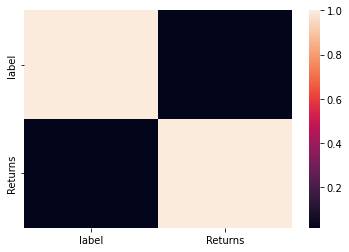

In [155]:
sns.heatmap(df[['label','Returns']].corr())

In [251]:
X_train=df[['label','stock_buy_perc']]
y_train=df['Returns']

In [252]:
from sklearn.ensemble import GradientBoostingRegressor
sklearn_gbm_fin = GradientBoostingRegressor(
#     n_estimators=150, 
#     learning_rate=0.1, 
#     max_depth=5
)
sklearn_gbm_fin.fit(X_train, y_train)

GradientBoostingRegressor()

In [253]:
y_pred=sklearn_gbm_fin.predict(X_train)
print('train MSE gb:'+str(mean_squared_error(y_pred, y_train, squared=False)))
print('train r2_score gb:'+str(r2_score(y_pred,y_train)))
print('train MAE gb:'+str(mean_absolute_error(y_pred,y_train)))

train MSE gb:0.03837472886344934
train r2_score gb:-46.8532241273553
train MAE gb:0.02160513796382646


In [254]:
df.head(10)

,Description,label,Headlines,Time,company,ticker,Company,Returns,stock_buy_perc,prediction
0,Several prominent investors put fresh money to...,2.0,Prominent managers loaded up on Apple before r...,2018-11-14,"['Apple', 'iPhone']",AAPL,Apple,0.024679,0.026237,0.000732
1,Asia's internet firms are challenging the regi...,0.0,Asia's tech champions zero in on main street b...,2019-04-15,"['Alibaba', 'Tencent']",BABA,Alibaba,0.014803,0.002424,0.000341
2,Australia's parliament on Thursday passed a bi...,2.0,Australia passes bill to force tech firms to h...,2018-12-06,"[""Alphabet Inc's"", 'Apple']",GOOG,"""Alphabet Incs""",-0.030127,0.011122,0.001923
3,Several large U.S. retailers recorded higher s...,2.0,Amazon U.S. rivals get sales boost on Prime Da...,2019-07-16,"[""Amazon.com Inc's"", 'Adobe Analytics']",AMZN,"""Amazon.com Incs""",0.009849,0.026807,0.001011
4,The U.S. listed equity options market is set f...,2.0,U.S. stock options volume on pace for a record...,2018-09-28,['OCC'],OCC,OCC,0.015113,0.000143,0.007325
5,"Schlumberger, the world's largest oilfield ser...",0.0,Exclusive: Schlumberger names new top executiv...,2020-05-21,['Schlumberger'],SLB,Schlumberger,-0.011804,0.000428,-0.002962
6,Tim Harris was preparing to relocate for an as...,1.0,"This could be the one that gets me,' says oilf...",2020-05-26,['Tim Harris'],ADAP,Tim Harris,-0.015192,0.000143,0.007271
7,EBay Inc raised its full-year sales and profit...,2.0,EBay raises forecast as redesign draws custome...,2019-04-23,['EBay Inc'],BTE,EBay Inc,-0.065502,0.001141,0.005197
8,Indonesia's Lion Air is considering cancelling...,0.0,Lion Air CEO says possible will cancel Boeing ...,2018-12-06,"['Lion Air', 'Boeing Co', 'MAX']",BATL,Lion Air,-0.109524,0.000143,-0.002949
9,Alibaba will stop taking orders from prospecti...,1.0,Alibaba to close books early in $13.4 billion ...,2019-11-18,['Alibaba'],BABA,Alibaba,-0.008650,0.002424,0.001512


In [255]:
y_pred[0:10]

array([ 0.00073225,  0.00034089,  0.00192261,  0.00101128,  0.0073246 ,
       -0.00296174,  0.00727124,  0.0051966 , -0.0029487 ,  0.00151216])

In [256]:
help(sklearn_gbm_fin)

Help on GradientBoostingRegressor in module sklearn.ensemble._gb object:

class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  Gradient Boosting for regression.
 |  
 |  GB builds an additive model in a forward stage-wise fashion;
 |  it allows for the optimization of arbitrary differentiable loss functions.
 |  In each stage a regression tree is fit on the negative gradient of the
 |  given loss function.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  ----------
 |  loss : {'ls', 'lad', 'huber', 'quantile'}, default='ls'
 |      Loss function to be optimized. 'ls' refers to least squares
 |      regression. 'lad' (least absolute deviation) is a highly robust
 |      loss function solely based on order information of the input
 |      variables. 'huber' is a combination of the two. 'quantile'
 |      allows quantile regression (use `alpha` to specify the quantile).
 |  
 |  learning_rate : float, default=0.1
 |

In [257]:
sklearn_gbm_fin.feature_importances_

array([0.17300553, 0.82699447])

In [258]:
sklearn_gbm_fin.n_features_

2

In [259]:
df['prediction']=y_pred

In [260]:
df.head()

,Description,label,Headlines,Time,company,ticker,Company,Returns,stock_buy_perc,prediction
0,Several prominent investors put fresh money to...,2.0,Prominent managers loaded up on Apple before r...,2018-11-14,"['Apple', 'iPhone']",AAPL,Apple,0.024679,0.026237,0.000732
1,Asia's internet firms are challenging the regi...,0.0,Asia's tech champions zero in on main street b...,2019-04-15,"['Alibaba', 'Tencent']",BABA,Alibaba,0.014803,0.002424,0.000341
2,Australia's parliament on Thursday passed a bi...,2.0,Australia passes bill to force tech firms to h...,2018-12-06,"[""Alphabet Inc's"", 'Apple']",GOOG,"""Alphabet Incs""",-0.030127,0.011122,0.001923
3,Several large U.S. retailers recorded higher s...,2.0,Amazon U.S. rivals get sales boost on Prime Da...,2019-07-16,"[""Amazon.com Inc's"", 'Adobe Analytics']",AMZN,"""Amazon.com Incs""",0.009849,0.026807,0.001011
4,The U.S. listed equity options market is set f...,2.0,U.S. stock options volume on pace for a record...,2018-09-28,['OCC'],OCC,OCC,0.015113,0.000143,0.007325


In [261]:
df['prediction'].nlargest(10)

15     0.007918
165    0.007918
190    0.007918
313    0.007918
412    0.007918
415    0.007918
443    0.007918
506    0.007918
641    0.007918
648    0.007918
Name: prediction, dtype: float64

In [262]:
df['prediction'].nsmallest(1)

177   -0.030575
Name: prediction, dtype: float64

In [313]:
df_test=pd.read_csv('Finance Headlines test - Sheet1.csv')

In [314]:
df_test.head()

,Headlines,Description,Date,ticker
0,Stock Market Today: S&P 500 ekes out win to re...,"The S&P 500 continued its record run Monday, c...",33 minutes ago,SPGI
1,S&P 500 correcting 10% 'highly likely' says Mo...,Traders should prepare for a stock market corr...,4 hours ago,SPGI
2,Is Nvidia’s Growth a Bubble or a Tale for Ages?,Nvidia Corp (NASDAQ\n) saw an unprecedented ri...,4 hours ago,NVDA
3,What is the next pain trades in stocks? Goldma...,Equity markets are expected to face a shift in...,4 hours ago,GSJ
4,"FAA orders inspection of 2,600 Boeing 737s ove...",The Federal Aviation Administration said on Mo...,3 minutes ago,NaN


In [315]:
df_test=df_test.merge(stock_buy_df['stock_buy_perc'],on='ticker',how='left')

In [316]:
df_test.head()

,Headlines,Description,Date,ticker,stock_buy_perc
0,Stock Market Today: S&P 500 ekes out win to re...,"The S&P 500 continued its record run Monday, c...",33 minutes ago,SPGI,0.000143
1,S&P 500 correcting 10% 'highly likely' says Mo...,Traders should prepare for a stock market corr...,4 hours ago,SPGI,0.000143
2,Is Nvidia’s Growth a Bubble or a Tale for Ages?,Nvidia Corp (NASDAQ\n) saw an unprecedented ri...,4 hours ago,NVDA,0.000856
3,What is the next pain trades in stocks? Goldma...,Equity markets are expected to face a shift in...,4 hours ago,GSJ,NaN
4,"FAA orders inspection of 2,600 Boeing 737s ove...",The Federal Aviation Administration said on Mo...,3 minutes ago,NaN,NaN


In [317]:
df_test=df_test.dropna()

In [318]:
df_test

,Headlines,Description,Date,ticker,stock_buy_perc
0,Stock Market Today: S&P 500 ekes out win to re...,"The S&P 500 continued its record run Monday, c...",33 minutes ago,SPGI,0.000143
1,S&P 500 correcting 10% 'highly likely' says Mo...,Traders should prepare for a stock market corr...,4 hours ago,SPGI,0.000143
2,Is Nvidia’s Growth a Bubble or a Tale for Ages?,Nvidia Corp (NASDAQ\n) saw an unprecedented ri...,4 hours ago,NVDA,0.000856
5,Boeing in talks with US Defense Department on ...,Boeing is in talks with the U.S. Defense Depar...,3 minutes ago,BA,0.040211
10,Microsoft to offer Apple devices to employees ...,Microsoft (NASDAQ\n) intends to offer Apple (N...,10 minutes ago,MSFT,0.004706
13,S&P 500 and Nasdaq notch record highs; chipmak...,The S&P 500 and Nasdaq notched record-high clo...,20 minutes ago,SPGI,0.000143
16,Pentagon to assess Boeing deal with DOJ before...,The Pentagon plans to assess Boeing (NYSE\n)'s...,29 minutes ago,BA,0.040211
18,US nuclear missile program to be years behind ...,A Pentagon program to replace some of its agin...,40 minutes ago,BA,0.040211
20,Bain Capital close to securing deal for Envest...,Private equity titan Bain Capital is reportedl...,42 minutes ago,BCSF,0.000570


In [319]:
df_test=df_test.iloc[1:]

In [320]:
df_test['ticker']=df_test['ticker'].drop_duplicates(keep='first')

C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [321]:
df_test

,Headlines,Description,Date,ticker,stock_buy_perc
1,S&P 500 correcting 10% 'highly likely' says Mo...,Traders should prepare for a stock market corr...,4 hours ago,SPGI,0.000143
2,Is Nvidia’s Growth a Bubble or a Tale for Ages?,Nvidia Corp (NASDAQ\n) saw an unprecedented ri...,4 hours ago,NVDA,0.000856
5,Boeing in talks with US Defense Department on ...,Boeing is in talks with the U.S. Defense Depar...,3 minutes ago,BA,0.040211
10,Microsoft to offer Apple devices to employees ...,Microsoft (NASDAQ\n) intends to offer Apple (N...,10 minutes ago,MSFT,0.004706
13,S&P 500 and Nasdaq notch record highs; chipmak...,The S&P 500 and Nasdaq notched record-high clo...,20 minutes ago,NaN,0.000143
16,Pentagon to assess Boeing deal with DOJ before...,The Pentagon plans to assess Boeing (NYSE\n)'s...,29 minutes ago,NaN,0.040211
18,US nuclear missile program to be years behind ...,A Pentagon program to replace some of its agin...,40 minutes ago,NaN,0.040211
20,Bain Capital close to securing deal for Envest...,Private equity titan Bain Capital is reportedl...,42 minutes ago,BCSF,0.000570


In [322]:
df_test=df_test.dropna()

In [323]:
df_test

,Headlines,Description,Date,ticker,stock_buy_perc
1,S&P 500 correcting 10% 'highly likely' says Mo...,Traders should prepare for a stock market corr...,4 hours ago,SPGI,0.000143
2,Is Nvidia’s Growth a Bubble or a Tale for Ages?,Nvidia Corp (NASDAQ\n) saw an unprecedented ri...,4 hours ago,NVDA,0.000856
5,Boeing in talks with US Defense Department on ...,Boeing is in talks with the U.S. Defense Depar...,3 minutes ago,BA,0.040211
10,Microsoft to offer Apple devices to employees ...,Microsoft (NASDAQ\n) intends to offer Apple (N...,10 minutes ago,MSFT,0.004706
20,Bain Capital close to securing deal for Envest...,Private equity titan Bain Capital is reportedl...,42 minutes ago,BCSF,0.000570


In [328]:
df_test['label']=[0,2,0,1,2]

C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [329]:
X_test=df_test[['label','stock_buy_perc']]

In [330]:
sklearn_gbm_fin.predict(X_test)

array([-0.0029487 ,  0.00403393, -0.00213669, -0.00060385,  0.00078214])